# Rf 3 1 6_Llratioplot

Multidimensional models: using the likelihood ratio techique to construct a signal enhanced one-dimensional projection of a multi-dimensional p.d.f.




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:51 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create 3D pdf and data
-------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -5, 5)
y = ROOT.RooRealVar("y", "y", -5, 5)
z = ROOT.RooRealVar("z", "z", -5, 5)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create signal pdf gauss(x)*gauss(y)*gauss(z)

In [3]:
gx = ROOT.RooGaussian(
    "gx", "gx", x, ROOT.RooFit.RooConst(0), ROOT.RooFit.RooConst(1))
gy = ROOT.RooGaussian(
    "gy", "gy", y, ROOT.RooFit.RooConst(0), ROOT.RooFit.RooConst(1))
gz = ROOT.RooGaussian(
    "gz", "gz", z, ROOT.RooFit.RooConst(0), ROOT.RooFit.RooConst(1))
sig = ROOT.RooProdPdf("sig", "sig", ROOT.RooArgList(gx, gy, gz))

Create background pdf poly(x)*poly(y)*poly(z)

In [4]:
px = ROOT.RooPolynomial("px", "px", x, ROOT.RooArgList(
    ROOT.RooFit.RooConst(-0.1), ROOT.RooFit.RooConst(0.004)))
py = ROOT.RooPolynomial("py", "py", y, ROOT.RooArgList(
    ROOT.RooFit.RooConst(0.1), ROOT.RooFit.RooConst(-0.004)))
pz = ROOT.RooPolynomial("pz", "pz", z)
bkg = ROOT.RooProdPdf("bkg", "bkg", ROOT.RooArgList(px, py, pz))

Create composite pdf sig+bkg

In [5]:
fsig = ROOT.RooRealVar("fsig", "signal fraction", 0.1, 0., 1.)
model = ROOT.RooAddPdf(
    "model", "model", ROOT.RooArgList(
        sig, bkg), ROOT.RooArgList(fsig))

data = model.generate(ROOT.RooArgSet(x, y, z), 20000)

Project pdf and data on x
-------------------------------------------------

Make plain projection of data and pdf on x observable

In [6]:
frame = x.frame(ROOT.RooFit.Title(
    "Projection of 3D data and pdf on X"), ROOT.RooFit.Bins(40))
data.plotOn(frame)
model.plotOn(frame)

<ROOT.RooPlot object ("frame_x_556699c43bf0") at 0x556699c43bf0>

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x integrates over variables (y,z)


Define projected signal likelihood ratio
----------------------------------------------------------------------------------

Calculate projection of signal and total likelihood on (y,z) observables
i.e. integrate signal and composite model over x

In [7]:
sigyz = sig.createProjection(ROOT.RooArgSet(x))
totyz = model.createProjection(ROOT.RooArgSet(x))

Construct the log of the signal / signal+background probability

In [8]:
llratio_func = ROOT.RooFormulaVar(
    "llratio", "log10(@0)-log10(@1)", ROOT.RooArgList(sigyz, totyz))

Plot data with a LL ratio cut
-------------------------------------------------------

Calculate the llratio value for each event in the dataset

In [9]:
data.addColumn(llratio_func)

<ROOT.RooRealVar object ("llratio") at 0x556699de4220>

Extract the subset of data with large signal likelihood

In [10]:
dataSel = data.reduce(ROOT.RooFit.Cut("llratio>0.7"))

Make plot frame

In [11]:
frame2 = x.frame(ROOT.RooFit.Title(
    "Same projection on X with LLratio(y,z)>0.7"), ROOT.RooFit.Bins(40))

Plot select data on frame

In [12]:
dataSel.plotOn(frame2)

<ROOT.RooPlot object ("frame_x_556699a96040") at 0x556699a96040>

Make MC projection of pdf with same LL ratio cut
---------------------------------------------------------------------------------------------

Generate large number of events for MC integration of pdf projection

In [13]:
mcprojData = model.generate(ROOT.RooArgSet(x, y, z), 10000)

Calculate LL ratio for each generated event and select MC events with
llratio)0.7

In [14]:
mcprojData.addColumn(llratio_func)
mcprojDataSel = mcprojData.reduce(ROOT.RooFit.Cut("llratio>0.7"))

Project model on x, projected observables (y,z) with Monte Carlo technique
on set of events with the same llratio cut as was applied to data

In [15]:
model.plotOn(frame2, ROOT.RooFit.ProjWData(mcprojDataSel))

c = ROOT.TCanvas("rf316_llratioplot", "rf316_llratioplot", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.4)
frame.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
c.SaveAs("rf316_llratioplot.png")

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x averages using data variables (y,z)
[#1] INFO:Plotting -- RooAbsReal::plotOn(model) only the following components of the projection data will be used: (y,z)
[#1] INFO:Plotting -- RooDataWeightedAverage::ctor(modelDataWgtAvg) constructing data weighted average of function model_Norm[x] over 767 data points of (y,z) with a total weight of 767
[#1] INFO:Minization --  The following expressions have been identified as constant and will be precalculated and cached: (gy,gz,py,pz)
.................................................................................................................................................

Info in <TCanvas::Print>: png file rf316_llratioplot.png has been created


Draw all canvases 

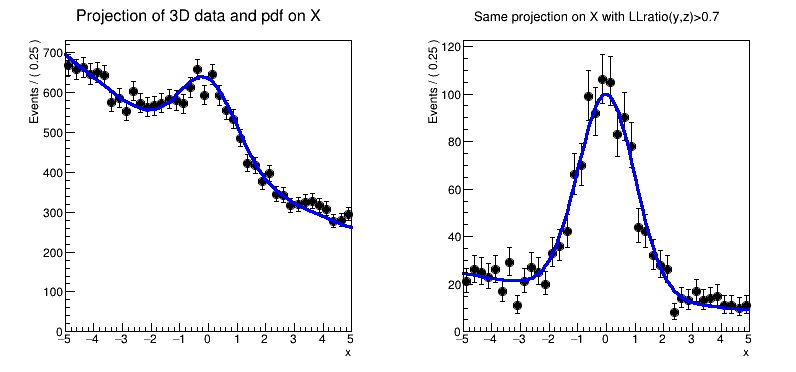

In [16]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()